In [4]:
import pandas as pd
import numpy as np
import os

import pylab as py
import scipy.optimize as opt
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [5]:
raw_data_path = os.path.join(os.path.pardir,'data','raw','heart_failure_clinical_records_dataset.csv')
raw_data = pd.read_csv(raw_data_path)
df = pd.read_csv(raw_data_path)

In [6]:
raw_data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
raw_data.shape

(299, 13)

In [8]:
raw_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### no null values. 

### getting to know unique values for each col


In [10]:
for col in df.columns:
    print(col,"\t",df[col].nunique(),len(df[col]))

age 	 47 299
anaemia 	 2 299
creatinine_phosphokinase 	 208 299
diabetes 	 2 299
ejection_fraction 	 17 299
high_blood_pressure 	 2 299
platelets 	 176 299
serum_creatinine 	 40 299
serum_sodium 	 27 299
sex 	 2 299
smoking 	 2 299
time 	 148 299
DEATH_EVENT 	 2 299


## Since we dont have seperate data for training and testing. Lets use k-fold cross validation. But before that try to split

## note: train_test_split requires equal number of rows in x and y

In [11]:
# x = df.columns.difference(['DEATH_EVENT'])
feature_col_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
result_col_name = ['DEATH_EVENT']

x = df[feature_col_names].values
y = df[result_col_name].values

# stratify ensures death events are split evenly among the 2 datasets, random_state can also be added
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,stratify = y)


In [12]:
print("percentage of true in train: {0:0.2f}%".format(len(y_train[y_train[:]==1])/len(y_train)))
print("percentage of true in test: {0:0.2f}%".format(len(y_test[y_test[:]==1])/len(y_test)))

percentage of true in train: 0.32%
percentage of true in test: 0.32%


### plotting corr

In [13]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

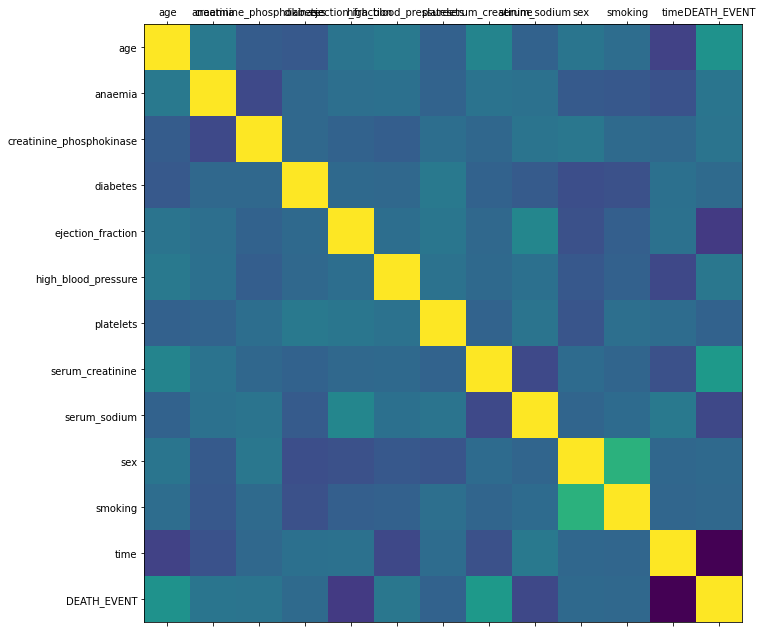

In [14]:
plot_corr(df)

## check for null vlaues

In [15]:
df.isnull().values.any()

False

## post-split data prep

In [16]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [17]:
df.age.unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [18]:
df.age.min()

40.0

In [19]:
df.age.max()

95.0

In [20]:
### lets do this for all columns
for col in df.columns:
    print(col,"\t",df[col].unique())

age 	 [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anaemia 	 [0 1]
creatinine_phosphokinase 	 [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334

In [21]:
print("Description: \n",df.describe())

Description: 
               age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000 

### try this for pip install

In [22]:
!pip install seaborn


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [23]:
import seaborn

<AxesSubplot:>

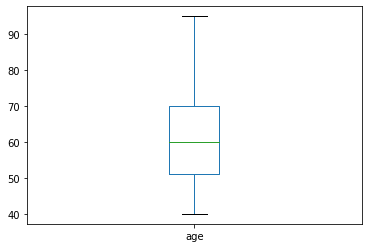

In [30]:
df.age.plot(kind='box')

## Dummy classifer or baseline model

In [31]:
from sklearn.dummy import DummyClassifier

In [32]:
baseline_model = DummyClassifier(strategy='most_frequent', random_state=0)
baseline_model.fit(x_train,y_train)
baseline_model.score(x_test,y_test)

0.6767676767676768

#### these models are based on very simple rules like probability.. make sure that the model u build will have higher scores than this

### before i proceed to use logistic regression, assumptions i m making:
* dependent variable: death, all other columns are independent variables [cross-checked this with help of corr]
* using logistic regression as result is a classifier and not a predictor
* 

In [35]:
from sklearn.linear_model import LogisticRegression

## yet to clearly understand tuning parameters of C and random_state
lr_model =LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7777777777777778

## Great! we achieved 75%+ accuracy